In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("D:/ML/credit.csv")

In [3]:
print(data.columns)
print(data.shape)

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')
(660, 7)


In [4]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


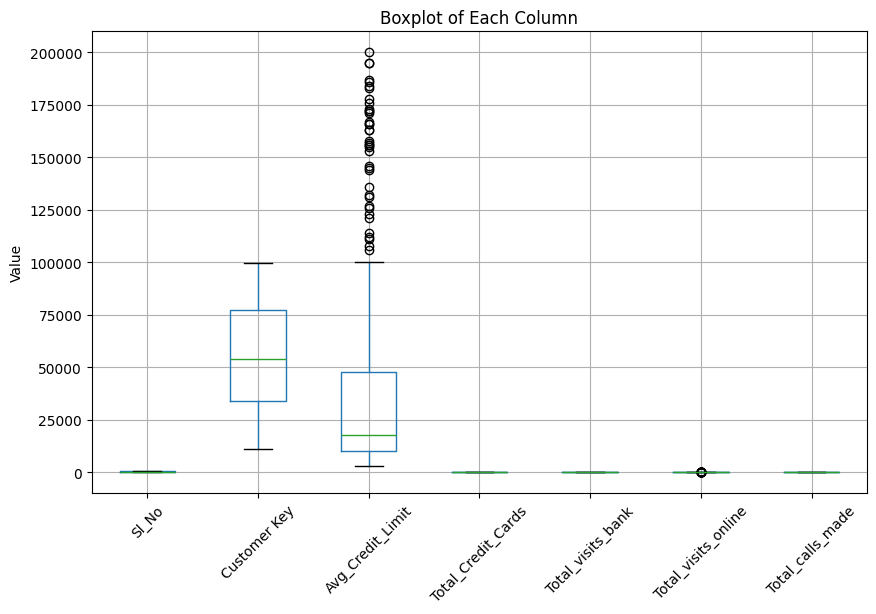

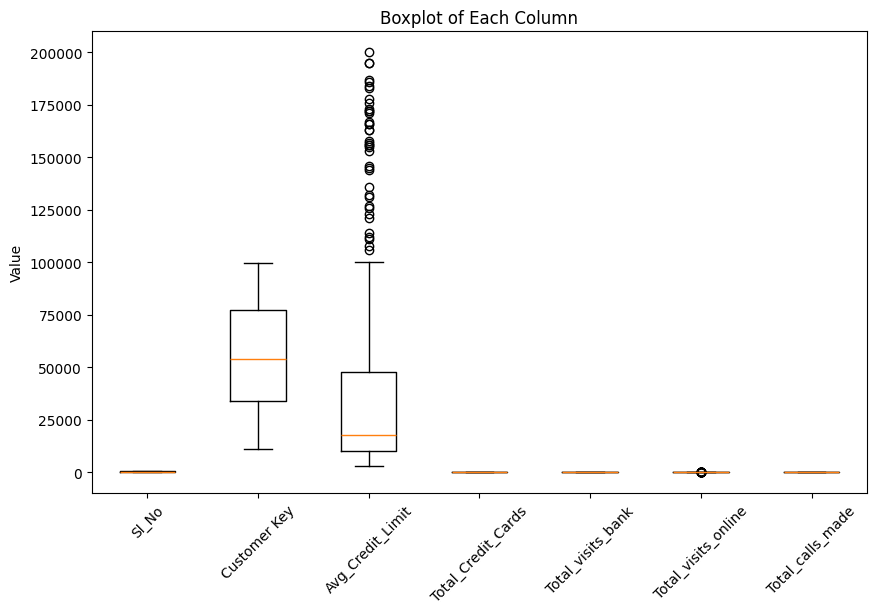

In [6]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=data)
# plt.title('Boxplot of Dataset Columns')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'df' with the actual name of your DataFrame if it's different

# Using pandas
data.boxplot(figsize=(10, 6))
plt.title('Boxplot of Each Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(data.values, labels=data.columns)
plt.title('Boxplot of Each Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [7]:
Q1 = data['Avg_Credit_Limit'].quantile(0.25)
Q3 = data['Avg_Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['Avg_Credit_Limit'] >= lower_bound) & (data['Avg_Credit_Limit'] <= upper_bound)]

# Display the shape of the original and cleaned datasets
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data.shape)

Original dataset shape: (621, 7)
Cleaned dataset shape: (621, 7)


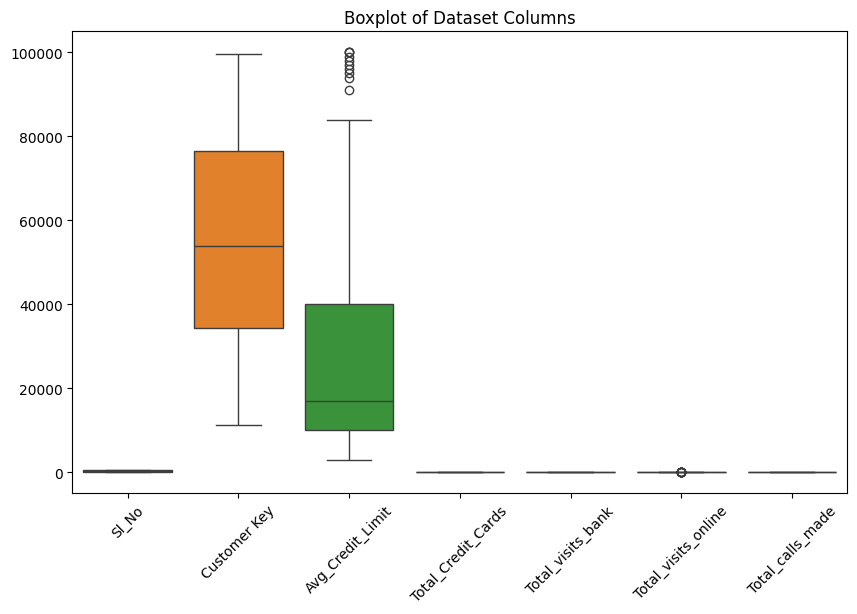

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Dataset Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [9]:
X = data.iloc[:, [0,2,3,4,5,6]].values
X[0]
X[1]

array([    2, 50000,     3,     0,    10,     9], dtype=int64)

[312627763650.9114]
[312627763650.9114, 66821085322.96829]
[312627763650.9114, 66821085322.96829, 29294462899.172165]
[312627763650.9114, 66821085322.96829, 29294462899.172165, 21754821232.98645]
[312627763650.9114, 66821085322.96829, 29294462899.172165, 21754821232.98645, 12810047275.522446]
[312627763650.9114, 66821085322.96829, 29294462899.172165, 21754821232.98645, 12810047275.522446, 10997571429.028551]
[312627763650.9114, 66821085322.96829, 29294462899.172165, 21754821232.98645, 12810047275.522446, 10997571429.028551, 5565558829.391743]
[312627763650.9114, 66821085322.96829, 29294462899.172165, 21754821232.98645, 12810047275.522446, 10997571429.028551, 5565558829.391743, 4066915789.0275693]
[312627763650.9114, 66821085322.96829, 29294462899.172165, 21754821232.98645, 12810047275.522446, 10997571429.028551, 5565558829.391743, 4066915789.0275693, 2996579311.4931264]
[312627763650.9114, 66821085322.96829, 29294462899.172165, 21754821232.98645, 12810047275.522446, 10997571429.028551,

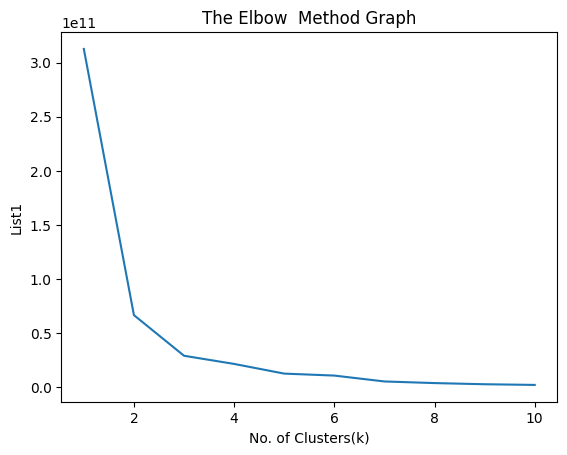

In [10]:
from sklearn.cluster import KMeans
list1 = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(X)
    list1.append(Kmeans.inertia_)
    print(list1)
plt.plot(range(1, 11), list1)
plt.title('The Elbow  Method Graph')
plt.xlabel('No. of Clusters(k)')
plt.ylabel('List1')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
#y_kmeans = kmeans.fit_predict(X)
#print(X[y_kmeans==0, 0], X[y_kmeans==0, 1] )
#print(X[y_kmeans==1, 0], X[y_kmeans==1, 1] )
#print(X[y_kmeans==2, 0], X[y_kmeans==2, 1] )
#print(X[y_kmeans==3, 0], X[y_kmeans==3, 1] )
#print(X[y_kmeans==4, 0], X[y_kmeans==4, 1] )
y_kmeans = kmeans.fit(X)

from sklearn import metrics
from sklearn.metrics import pairwise_distances

labels = y_kmeans.labels_
print(labels)
#Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
metrics.silhouette_score(X, labels, metric='euclidean') 

[2 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 0 2 2 2 0 2
 0 0 2 0 0 0 0 2 0 0 2 2 2 0 2 2 0 0 0 2 0 2 0 2 2 2 2 0 2 2 0 0 2 0 0 0 2
 2 0 2 2 0 0 0 0 0 2 1 0 0 2 2 2 1 0 2 0 0 0 2 0 0 2 0 0 0 1 0 0 2 0 0 0 0
 0 2 0 0 2 2 0 0 0 2 2 0 

0.7074243621289421

In [ ]:
#6 Visualising the clusters

y_kmeans = kmeans.fit_predict(X)
#print(X)
print(y_kmeans)

#print(len(X[y_kmeans==0, 0]))#, X[y_kmeans==0, 1])
#print(X[y_kmeans==0, 0])
#print(print(X[y_kmeans==0, 0], X[y_kmeans==0, 1]))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()